In [1]:
# https://www.kaggle.com/datasets/deepak711/4-subject-data-text-classification

In [2]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess

import spacy
from pprint import pprint
import pandas as pd
import os

from tqdm import tqdm

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use'])

In [3]:
def find_txt_files(directory):
    txt_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.txt'):
                txt_files.append(os.path.join(root, file))
    return txt_files

In [4]:
def read_txt_file(file_path):
    try:
        with open(file_path, 'r', encoding="utf8") as file:
            file_contents = file.read()
        return file_contents
    except FileNotFoundError:
        return "File not found."

In [5]:
def sent_to_words(sentences):
    for sentence in tqdm(sentences):
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [6]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [7]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in tqdm(texts):
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [8]:
# category 1: Computer Science
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Computer_Science"
file_list = find_txt_files(directory_path)

file_contents_ComputerScience = []
labels_ComputerScience = []
for file in file_list:
    file_contents_ComputerScience.append(read_txt_file(file))
    labels_ComputerScience.append("Computer Science")

In [9]:
# category 2: History
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\History"
file_list = find_txt_files(directory_path)

file_contents_History = []
labels_History = []
for file in file_list:
    file_contents_History.append(read_txt_file(file))
    labels_History.append("History")

In [10]:
# category 3: Maths
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Maths"
file_list = find_txt_files(directory_path)

file_contents_Maths = []
labels_Maths = []
for file in file_list:
    file_contents_Maths.append(read_txt_file(file))
    labels_Maths.append("Maths")

In [11]:
# category 4: accounts
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\accounts"
file_list = find_txt_files(directory_path)

file_contents_accounts = []
labels_accounts = []
for file in file_list:
    file_contents_accounts.append(read_txt_file(file))
    labels_accounts.append("accounts")

In [12]:
# category 5: physics
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\physics"
file_list = find_txt_files(directory_path)

file_contents_physics = []
labels_physics = []
for file in file_list:
    file_contents_physics.append(read_txt_file(file))
    labels_physics.append("physics")

In [13]:
# category 6: geography
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\geography"
file_list = find_txt_files(directory_path)

file_contents_geography = []
labels_geography = []
for file in file_list:
    file_contents_geography.append(read_txt_file(file))
    labels_geography.append("geography")

In [14]:
# category 7: biology
directory_path = "C:\\Users\\Daniel Atzberger\\Documents\\IEEE_Vis24\\data\\Seven Categories\\Physics_Biology_Geography_Accounts subject training data for text classification\\train_data_final\\biology"
file_list = find_txt_files(directory_path)

file_contents_biology = []
labels_biology = []
for file in file_list:
    file_contents_biology.append(read_txt_file(file))
    labels_biology.append("biology")

In [15]:
data = file_contents_ComputerScience + file_contents_History + file_contents_Maths + file_contents_accounts + file_contents_physics + file_contents_geography + file_contents_biology
data_words = list(sent_to_words(data))

Y = labels_ComputerScience + labels_History + labels_Maths + labels_accounts + labels_physics + labels_geography + labels_biology

# Remove Stop Words
print("Start removing stop words")
data_words_nostops = remove_stopwords(data_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# conda install -c conda-forge spacy-model-en_core_web_sm
print("Installing spacy")
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
print("Start lemmatizing words")
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

100%|█████████████████████████████████████████████████████████████████████████████| 3142/3142 [00:03<00:00, 976.24it/s]


Start removing stop words
Installing spacy
Start lemmatizing words


100%|██████████████████████████████████████████████████████████████████████████████| 3142/3142 [00:53<00:00, 58.84it/s]


In [16]:
print(data[0])
print(data_lemmatized[0])

84 Chapter 2 Instructions: Language of the Computer
The parameter variable n corresponds to the argument register $aO. The
ANSWER
compiled program starts with the label of the procedure and then saves two
registers on the stack, the return address and $a0:
fact :
addi $sp , $sp , - 8 # adjust stack for 2 items
sw $ra , 4($sp) # save the return address
sw $aO , O($sp) # save the argument n
The first time fact is called, sw saves an address in the program that called
f act. The next two instructions test if n is less than 1, going to Ll if n ;::.: 1.
<
slti HO,$aO,1 It test for n 1
beq HO,$zero,Ll It if n ) = 1 , go to Ll
If n is less than 1, fact returns 1 by putting 1 into a value register: it adds 1
to 0 and places that sum in $vO. It then pops the two saved values off the
stack and jumps to the return address:
addi hO , $zero , 1 It return 1
addi $sp , $sp , 8 It pop 2 items off stack
Jr Ira It return to after jal
°
Before popping two items off the stack, we could have loaded $a and 

In [17]:
data_lemmatized_min_length = []

for sublist in tqdm(data_lemmatized):
    # Use a list comprehension to filter out strings with less than two characters
    sublist = [word for word in sublist if len(word) > 2]
    data_lemmatized_min_length.append(sublist)

100%|███████████████████████████████████████████████████████████████████████████| 3142/3142 [00:00<00:00, 50118.29it/s]


In [18]:
#print(data[0])
#print(data_lemmatized[0])
print(data_lemmatized_min_length[0])

['chapter', 'instruction', 'language', 'computer', 'parameter', 'variable', 'correspond', 'argument', 'register', 'answer', 'compile', 'program', 'start', 'label', 'procedure', 'save', 'two', 'register', 'stack', 'return', 'address', 'fact', 'addi', 'adjust', 'stack', 'item', 'save', 'return', 'address', 'save', 'argument', 'first', 'time', 'fact', 'call', 'save', 'address', 'program', 'call', 'act', 'next', 'two', 'instruction', 'test', 'less', 'slti', 'test', 'beq', 'zero', 'less', 'fact', 'return', 'put', 'value', 'register', 'add', 'place', 'sum', 'pop', 'two', 'save', 'value', 'stack', 'jump', 'return', 'address', 'addi', 'zero', 'return', 'addi', 'pop', 'item', 'stack', 'ira', 'return', 'jal', 'pop', 'two', 'item', 'stack', 'could', 'load', 'since', 'change', 'less', 'skip', 'instruction', 'less', 'argument', 'decremented', 'fact', 'call', 'decremented', 'value', 'addi', 'argument', 'get', 'jalfact', 'call', 'fact', 'next', 'instruction', 'fact', 'return', 'old', 'return', 'addre

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized_min_length)

# Create Corpus
texts = data_lemmatized_min_length

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View 
print(corpus[:1])

[[(0, 1), (1, 1), (2, 5), (3, 6), (4, 2), (5, 1), (6, 1), (7, 6), (8, 1), (9, 4), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 6), (18, 1), (19, 1), (20, 4), (21, 1), (22, 4), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 4), (29, 1), (30, 2), (31, 2), (32, 1), (33, 1), (34, 2), (35, 4), (36, 1), (37, 2), (38, 1), (39, 3), (40, 3), (41, 10), (42, 5), (43, 1), (44, 1), (45, 1), (46, 7), (47, 1), (48, 1), (49, 2), (50, 1), (51, 4), (52, 3), (53, 1), (54, 2)]]


#### Vector Space Model (VSM)

In [20]:
from scipy.sparse import dok_matrix

# Define function to convert Gensim corpus to a sparse pandas DataFrame
def corpus_to_sparse_dataframe(corpus):
    word_freq = dok_matrix((len(corpus), len(id2word)), dtype=int)

    for i, doc in enumerate(corpus):
        for word_id, freq in doc:
            word_freq[i, word_id] = freq

    dataframe = pd.DataFrame.sparse.from_spmatrix(word_freq)
    dataframe.columns = [id2word[word_id] for word_id in range(len(id2word))]
    return dataframe

In [21]:
VSM = corpus_to_sparse_dataframe(corpus)

#### Distance Matrix in Origin Space

In [22]:
from scipy import spatial
from scipy.spatial.distance import pdist

def compute_distance_list(X, eval_distance_metric='cosine'):
    return spatial.distance.pdist(X, eval_distance_metric)

In [23]:
a = compute_distance_list(VSM)

In [26]:
len(a)

4934511

In [28]:
VSM.shape

(3142, 35865)

#### Two-Dimensional Representation

In [29]:
# Build LDA model
K = 14
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=K,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=400,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

# Print the Keywords in the 3 topics
pprint(lda_model.print_topics())

[(0,
  '0.030*"cash" + 0.030*"account" + 0.026*"debenture" + 0.022*"balance" + '
  '0.020*"book" + 0.019*"issue" + 0.016*"national" + 0.016*"amount" + '
  '0.014*"statement" + 0.013*"purchase"'),
 (1,
  '0.102*"member" + 0.040*"emission" + 0.011*"rat" + 0.005*"temp" + '
  '0.002*"notify" + 0.001*"encoding" + 0.001*"aluopo" + 0.001*"aco" + '
  '0.001*"este" + 0.001*"finalize"'),
 (2,
  '0.056*"plant" + 0.028*"organism" + 0.022*"animal" + 0.021*"water" + '
  '0.017*"united" + 0.016*"specie" + 0.014*"biology" + 0.012*"female" + '
  '0.011*"food" + 0.011*"growth"'),
 (3,
  '0.020*"cell" + 0.017*"call" + 0.012*"one" + 0.012*"figure" + 0.011*"also" + '
  '0.011*"form" + 0.008*"use" + 0.008*"two" + 0.008*"system" + '
  '0.008*"process"'),
 (4,
  '0.089*"share" + 0.034*"call" + 0.031*"application" + 0.029*"political" + '
  '0.027*"capital" + 0.021*"allotment" + 0.017*"per" + 0.016*"disk" + '
  '0.015*"equity" + 0.013*"receive"'),
 (5,
  '0.116*"ﬁeld" + 0.051*"negative" + 0.043*"line" + 0.041*"

In [30]:
rows = []
for doc in corpus:
    doc_top = []
    for t in lda_model.get_document_topics(doc, minimum_probability = 0):
        doc_top.append(t[1])
    rows.append(doc_top)

In [31]:
document_topic_matrix = pd.DataFrame(rows)
# document_topic_matrix

In [32]:
def string_to_int_mapping(strings):
    # Create a dictionary to store string to integer mapping
    string_to_int = {}
    int_sequence = []

    # Assign a unique integer to each unique string
    for string in strings:
        if string not in string_to_int:
            string_to_int[string] = len(string_to_int)  # Assign the next available integer
        # Append the corresponding integer to the sequence
        int_sequence.append(string_to_int[string])

    return int_sequence, string_to_int

In [33]:
Y_converted,_ = string_to_int_mapping(Y)

In [34]:
# Dimensionality reduction 1: tSNE

import time
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform, jensenshannon, cosine

#n_sne = 7000

time_start = time.time()
#tsne = TSNE(n_iter=300)
#tsne = TSNE(n_components=2, n_iter = 2000, perplexity=40)
metric = jensenshannon
tsne = TSNE(n_components=2, perplexity=20, metric = metric, random_state = 0)
tsne_results = tsne.fit_transform(document_topic_matrix)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 251.86837649345398 seconds


C:\Users\Daniel Atzberger\AppData\Local\Temp\ipykernel_37376\3463357914.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Paired'),


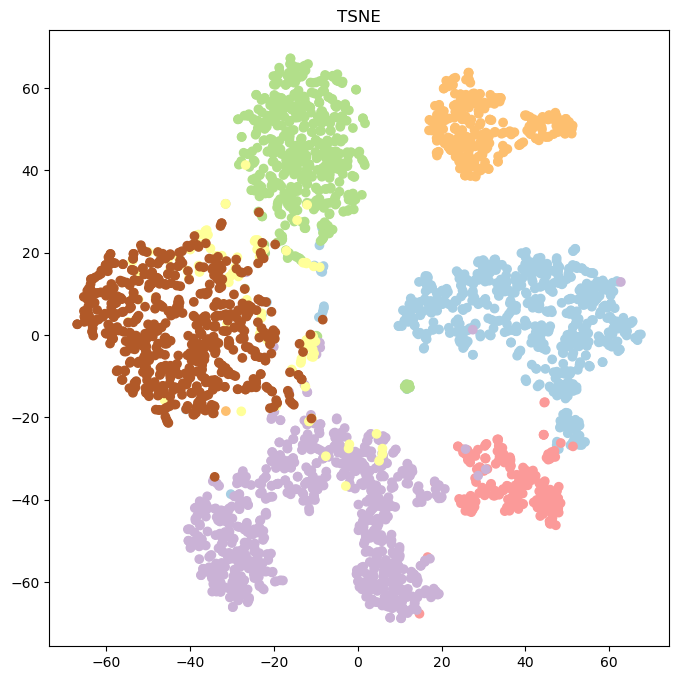

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0], 
    y=tsne_results[:,1], 
    c=Y_converted, 
    cmap=plt.cm.get_cmap('Paired'), 
    alpha=1.0)
plt.show()

#### Distance Matrix in Lower-Dimensional Space

In [36]:
tsne_results.shape

(3142, 2)

In [37]:
b = compute_distance_list(tsne_results, eval_distance_metric='euclidean')

In [47]:
from scipy.stats import spearmanr

def metric_shepard_diagram_correlation(D_high, D_low):
    return stats.spearmanr(D_high, D_low)[0]

In [59]:
from scipy.stats import spearmanr

# Define the two lists of integers
list1 = [10, 24, 30, 40, 50]
list2 = [12, 24, 31, 47, 55]

# Compute the Spearman rank correlation
correlation, p_value = spearmanr(a,b)
print(correlation)

nan


In [ ]:
tsne_results[0]

In [ ]:
tsne_results[1]

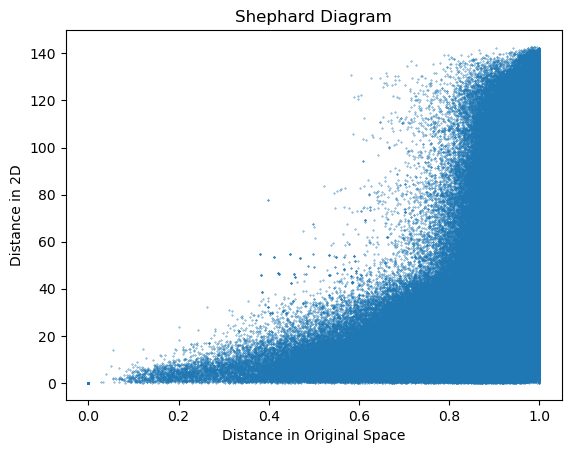

In [51]:
plt.scatter(a, b, s=0.1)
plt.xlabel('Distance in Original Space')
plt.ylabel('Distance in 2D')
plt.title('Shephard Diagram')
plt.show()